# 퍼셉트론 구현
- 다양한 방식의 퍼셉트론 구현 실습

## 순수 Python만 사용하여 구현

In [1]:
epsilon = 0.0000001

def perceptron(x1, x2):
    w1, w2, b = 1.0, 1.0, -1.5
    sum = x1*w1+x2*w2+b
    # sum = x1*w1 + x2*w2 + w0
    if sum > epsilon :		# 부동소수점 오차를 방지하기 위하여
        return sum, 1
    else :
        return sum, 0
    
print(perceptron(0, 0))
print(perceptron(1, 0))
print(perceptron(0, 1))
print(perceptron(1, 1))

(-1.5, 0)
(-0.5, 0)
(-0.5, 0)
(0.5, 1)


## Numpy 사용하여 구현

In [2]:
import numpy as np
epsilon = 0.0000001

def perceptron(x1, x2):
    X = np.array([x1, x2])
    W = np.array([1.0, 1.0])
    B = -1.5
    sum = np.dot(W, X)+B
    if sum > epsilon :
        return 1
    else :
        return 0

print(perceptron(0, 0))
print(perceptron(1, 0))
print(perceptron(0, 1))
print(perceptron(1, 1))

0
0
0
1


## Numpy 사용하여 퍼셉트론 학습

In [3]:
import numpy as np

def step_func(t):		# 퍼셉트론의 활성화 함수
    if t > epsilon: return 1
    else: return 0

def perceptron_fit(X, Y, epochs=10):	# 퍼셉트론 학습 알고리즘 구현
    global W
    eta = 0.2				# 학습률

    for t in range(epochs):
        print("epoch=", t+1, "======================")
        for i in range(len(X)):
            predict = step_func(np.dot(X[i], W))
            error = Y[i] - predict		# 오차 계산
            W += eta * error * X[i]		# 가중치 업데이트
            print("현재 처리 입력=",X[i],"정답=",Y[i],"출력=",predict,"변경된 가중치=", W)
        print("================================")

def perceptron_predict(X, Y):		# 예측	
    global W
    for x in X:
         print(x[0], x[1], "->", step_func(np.dot(x, W)))

epsilon = 0.0000001		# 부동소수점 오차 방지

X = np.array([			# 훈련 데이터 세트
    [0, 0, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [0, 1, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 0, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 1, 1]			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
])
	
y = np.array([0, 0, 0, 1])	# 정답을 저장하는 넘파이 행렬
W = np.zeros(len(X[0]))	# 가중치를 저장하는 넘파이 행렬

In [4]:
perceptron_fit(X, y, 6)

epoch= 1 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [0 1 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [1 0 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [0.2 0.2 0.2]
epoch= 2 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 1 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.  -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 0 변경된 가중치= [ 0.2  0.  -0.2]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [0.4 0.2 0. ]
epoch= 3 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [0.4 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 0 출력= 1 변경된 가중치= [ 0.4  0.  -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.  -0.4]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
epoch= 4 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
현재 처리 입력= [0 1 1] 정답= 0 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.2 -0.4]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [ 0.4  0.4 -0.2]
epoch=

In [5]:
perceptron_predict(X, y)

0 0 -> 0
0 1 -> 0
1 0 -> 0
1 1 -> 1


# Scikit-learn 사용하여 퍼셉트론 구현 및 학습

In [8]:
from sklearn.linear_model import Perceptron

# 논리적 AND 연산 샘플과 정답이다. 
X = [[0,0],[0,1],[1,0],[1,1]]		# 항상 2차원 배열이어야 한다. 
# X = [[0],[1],[2],[3]]		# 항상 2차원 배열이어야 한다. 
y = [0, 0, 0, 1]

# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의 시드이다.
clf = Perceptron(tol=1e-3, random_state=0)

# 학습을 수행한다. 
clf.fit(X, y)

# 테스트를 수행한다. 
print(clf.predict(X))

[0 0 0 1]


## 시각화

1.0


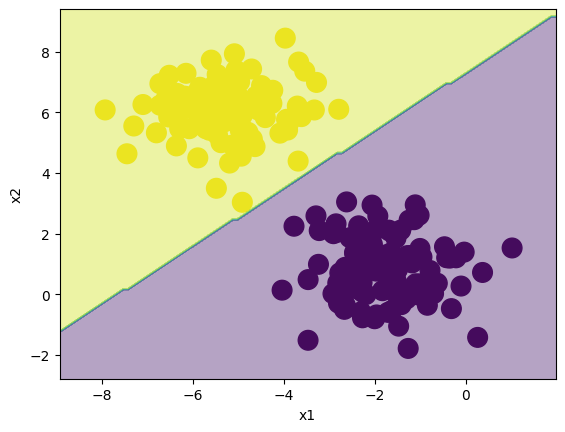

In [14]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
import numpy as np

# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의 시드이다.
clf = Perceptron(tol=1e-3, random_state=0)

# 뭉쳐진 데이터를 만든다. 샘플의 개수는 총 100개, 클러스터의 개수는 2개이다. 
X, y = make_blobs(n_samples=200, centers=2)
# print(X)
# print(y)
clf.fit(X, y)

from sklearn.metrics import accuracy_score
print(accuracy_score(clf.predict(X), y))

# 데이터를 그래프 위에 표시한다. 
plt.scatter(X[:, 0], X[:, 1], c=y, s=200)
plt.xlabel("x1")
plt.ylabel("x2")

# 데이터에서 최소 좌표와 최대 좌표를 계산한다. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 0.1 간격으로 메쉬 그리드 좌표를 만든다. 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# 메쉬 그리드 데이터에 대하여 예측을 한다. 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 컨투어를 그린다. 
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()